In [13]:

from multissl.data.mask_loader import SegmentationDataset
import torch
import pytorch_lightning as pl
import os
from multissl.models.randomforest import RandomForestSegmentation
from multissl.plotting import visualize_predictions
from torchvision import transforms
from torch.utils.data import DataLoader

In [14]:
CONFIG = {
    "img_dir": "../dataset/vineseg/imgs",  # Update with your path
    "mask_dir": "../dataset/vineseg/masks",  # Update with your path
    "output_dir": "/segmentation_checkpoints",
    "model_filename": "randomforest.pkl",
    "random_seed": 42,
    "n_estimators" : 100,
    "max_depth": None,
    "pixel_features": True,
    "spatial_features": False,
    "texture_features": False,
    "img_size": 224,
    "in_channels": 4,
    "batch_size": 4,
    "num_workers": 0,
    "class_names": ["background", "vines"],
    "num_classes": 2,
    "device": "cpu"
}

In [15]:
# Set random seed for reproducibility
pl.seed_everything(CONFIG["random_seed"])

# Create output directory
os.makedirs(CONFIG["output_dir"], exist_ok=True)

# Create datasets
from multissl.data.seg_transforms import SafeUIntToFloat, ToTensorSafe


Seed set to 42


In [16]:
train_dataset = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "train_1vary"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "train_1vary"),
    img_size=CONFIG["img_size"]
)

val_dataset = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "val_esac2"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "val_esac2"),
    img_size=CONFIG["img_size"]
)

test_dataset_v = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "test_valdoeiro"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "test_valdoeiro"),
    img_size=CONFIG["img_size"]
)

test_dataset_q = SegmentationDataset(
    img_dir=os.path.join(CONFIG["img_dir"], "test_qbaixo"),
    mask_dir=os.path.join(CONFIG["mask_dir"], "test_qbaixo"),
    img_size=CONFIG["img_size"]
)

# Create dataloaders
train_loader = DataLoader(
    train_dataset,
    batch_size=CONFIG["batch_size"],
    shuffle=True,
    num_workers=CONFIG["num_workers"],
)

val_loader = DataLoader(
    val_dataset,
    batch_size=CONFIG["batch_size"],
    shuffle=False,
    num_workers=0,
    pin_memory=True,

)

test_loader_v = DataLoader(
    test_dataset_v,
    batch_size=CONFIG["batch_size"],
    shuffle=False,
    num_workers=0,
    pin_memory=True,

)
test_loader_q = DataLoader(
    test_dataset_q,
    batch_size=CONFIG["batch_size"],
    shuffle=False,
    num_workers=0,
    pin_memory=True,

)
# Print dataset sizes
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size valdoeiro: {len(test_dataset_v)}")
print(f"Test dataset size qbaixo: {len(test_dataset_q)}")

Train dataset size: 3
Validation dataset size: 97
Test dataset size valdoeiro: 157
Test dataset size qbaixo: 141


In [17]:


# Create model
model = RandomForestSegmentation(
    n_estimators= CONFIG["n_estimators"],
    max_depth=CONFIG["max_depth"],
    pixel_features=CONFIG["pixel_features"] ,
    texture_features=CONFIG["texture_features"] ,
    spatial_features=CONFIG["spatial_features"] ,
    img_size=CONFIG["img_size"],
    in_channels=CONFIG["in_channels"],

    class_weight='balanced',
    )

# Train model
metrics = model.fit(train_loader, val_loader)




Extracting features from training data...


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42.91it/s]

Training on 150528 pixels with 4 features per pixel
Training random forest...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.1s finished


Training accuracy: 0.9501
Validating model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/25 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            

Validation accuracy: 0.4822
Validation IoU: 0.2875
Validation F1: 0.4200


In [18]:


# Test model
test_metrics_v = model.validate(test_loader_v)
# Test model
test_metrics_q = model.validate(test_loader_q)

Validating model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/40 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            

Validation accuracy: 0.9587
Validation IoU: 0.7718
Validation F1: 0.8552
Validating model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/36 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            

Validation accuracy: 0.8410
Validation IoU: 0.5972
Validation F1: 0.7201


In [19]:
import numpy as np
def evaluate_rf_model(rf_model, test_loader, calculate_std_error=True, class_names=None):
    """
    Evaluate a RandomForestSegmentation model on test data with standard error calculation.
    
    Args:
        rf_model: A trained RandomForestSegmentation model
        test_loader: DataLoader for the test dataset
        calculate_std_error: Whether to calculate standard error of metrics
        class_names: List of class names for printing results
        
    Returns:
        Dictionary containing evaluation metrics with mean and standard error
    """
    if class_names is None:
        class_names = ["Background", "Vines"]  # Default class names
    
    # Lists to store per-batch metrics
    batch_metrics = {
        'accuracy': [],
        'iou': [],
        'f1': [],
        'precision': [],
        'recall': []
    }
    
    # Lists to store per-class metrics for each batch
    class_metrics = {
        'iou': [[] for _ in range(len(class_names))],
        'f1': [[] for _ in range(len(class_names))],
        'precision': [[] for _ in range(len(class_names))],
        'recall': [[] for _ in range(len(class_names))]
    }
    
    # Process each batch in the test loader
    from tqdm import tqdm
    from sklearn.metrics import accuracy_score, jaccard_score, f1_score, precision_score, recall_score
    
    print("Evaluating RandomForestSegmentation model...")
    
    for batch_idx, (images, masks) in enumerate(tqdm(test_loader)):
        batch_size = images.shape[0]
        
        # Process each image in the batch
        for i in range(batch_size):
            image = images[i]
            true_mask = masks[i].cpu().numpy()
            
            # Get prediction
            pred_mask = rf_model.predict(image)
            
            # Flatten masks for metric calculation
            true_flat = true_mask.flatten()
            pred_flat = pred_mask.flatten()
            
            # Calculate overall metrics
            accuracy = accuracy_score(true_flat, pred_flat)
            iou = jaccard_score(true_flat, pred_flat, average='macro')
            f1 = f1_score(true_flat, pred_flat, average='macro')
            precision = precision_score(true_flat, pred_flat, average='macro')
            recall = recall_score(true_flat, pred_flat, average='macro')
            
            batch_metrics['accuracy'].append(accuracy)
            batch_metrics['iou'].append(iou)
            batch_metrics['f1'].append(f1)
            batch_metrics['precision'].append(precision)
            batch_metrics['recall'].append(recall)
            
            # Calculate per-class metrics if requested
            if calculate_std_error:
                num_classes = len(class_names)
                for c in range(num_classes):
                    # Calculate binary metrics for this class
                    class_true = (true_flat == c)
                    class_pred = (pred_flat == c)
                    
                    if np.any(class_true) or np.any(class_pred):  # Only calculate if class exists in prediction or ground truth
                        class_iou = jaccard_score(class_true, class_pred, average='binary')
                        class_f1 = f1_score(class_true, class_pred, average='binary')
                        class_precision = precision_score(class_true, class_pred, average='binary', zero_division=0)
                        class_recall = recall_score(class_true, class_pred, average='binary', zero_division=0)
                        
                        class_metrics['iou'][c].append(class_iou)
                        class_metrics['f1'][c].append(class_f1)
                        class_metrics['precision'][c].append(class_precision)
                        class_metrics['recall'][c].append(class_recall)
                    else:
                        # No instances of this class in this image
                        class_metrics['iou'][c].append(0)
                        class_metrics['f1'][c].append(0)
                        class_metrics['precision'][c].append(0)
                        class_metrics['recall'][c].append(0)
    
    # Calculate average metrics
    results = {}
    
    # Calculate mean and standard error for overall metrics
    for metric in ['accuracy', 'iou', 'f1', 'precision', 'recall']:
        values = np.array(batch_metrics[metric])
        results[f'mean_{metric}'] = np.mean(values)
        if calculate_std_error:
            results[f'std_error_{metric}'] = np.std(values) / np.sqrt(len(values))
    
    # Calculate mean and standard error for per-class metrics
    if calculate_std_error:
        for metric in ['iou', 'f1', 'precision', 'recall']:
            for c in range(len(class_names)):
                values = np.array(class_metrics[metric][c])
                results[f'mean_{metric}_class{c}'] = np.mean(values)
                results[f'std_error_{metric}_class{c}'] = np.std(values) / np.sqrt(len(values))
    
    # Print results
    print("\n===== RandomForest Segmentation Performance =====")
    print(f"Accuracy: {results['mean_accuracy']:.4f}" + 
          (f" ± {results['std_error_accuracy']:.4f}" if calculate_std_error else ""))
    print(f"Mean IoU: {results['mean_iou']:.4f}" + 
          (f" ± {results['std_error_iou']:.4f}" if calculate_std_error else ""))
    print(f"Mean F1: {results['mean_f1']:.4f}" + 
          (f" ± {results['std_error_f1']:.4f}" if calculate_std_error else ""))
    print(f"Mean Precision: {results['mean_precision']:.4f}" + 
          (f" ± {results['std_error_precision']:.4f}" if calculate_std_error else ""))
    print(f"Mean Recall: {results['mean_recall']:.4f}" + 
          (f" ± {results['std_error_recall']:.4f}" if calculate_std_error else ""))
    
    if calculate_std_error:
        print("\nPer-class metrics:")
        for i in range(len(class_names)):
            print(f"{class_names[i]}:")
            print(f"  Precision: {results[f'mean_precision_class{i}']:.4f} ± {results[f'std_error_precision_class{i}']:.4f}")
            print(f"  Recall: {results[f'mean_recall_class{i}']:.4f} ± {results[f'std_error_recall_class{i}']:.4f}")
            print(f"  F1 Score: {results[f'mean_f1_class{i}']:.4f} ± {results[f'std_error_f1_class{i}']:.4f}")
            print(f"  IoU: {results[f'mean_iou_class{i}']:.4f} ± {results[f'std_error_iou_class{i}']:.4f}")
    
    return results

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


RandomForest identified


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


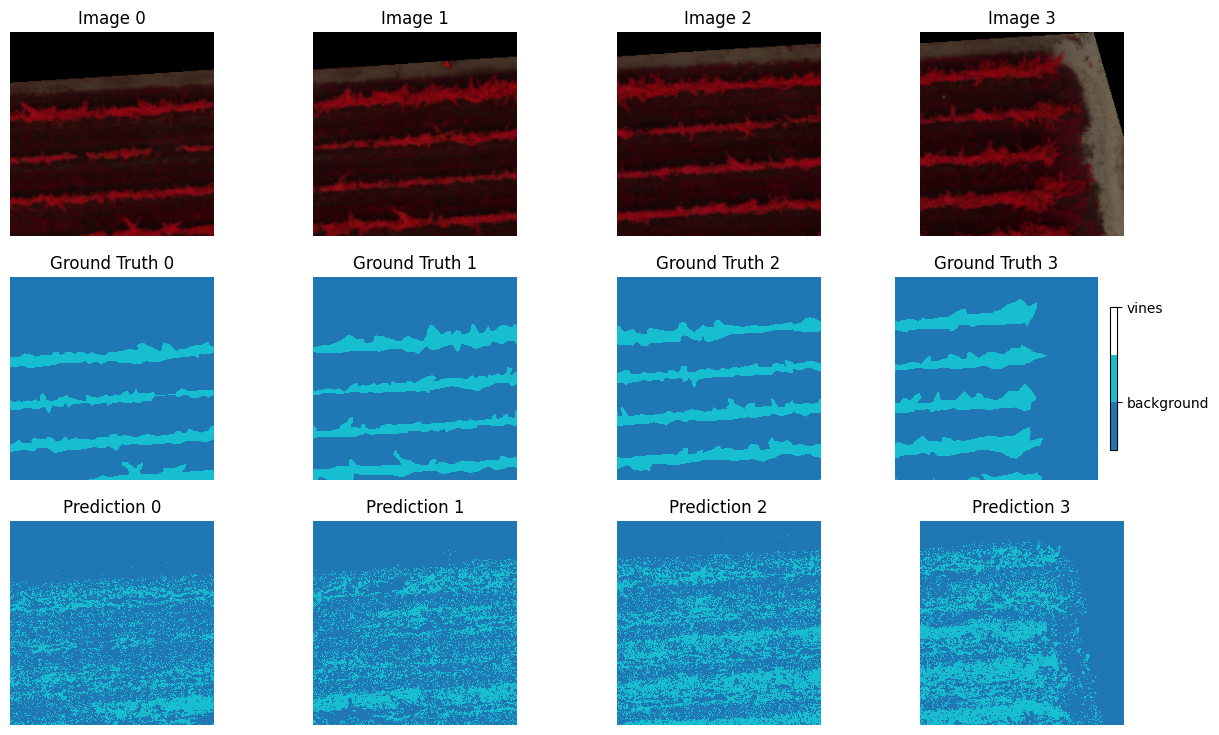

In [20]:
visualize_predictions(
    model=model,
    dataloader=val_loader,
    num_samples=4,
    class_names=CONFIG["class_names"],
    num_classes=CONFIG["num_classes"],
    device = CONFIG["device"]
)

RandomForest identified


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


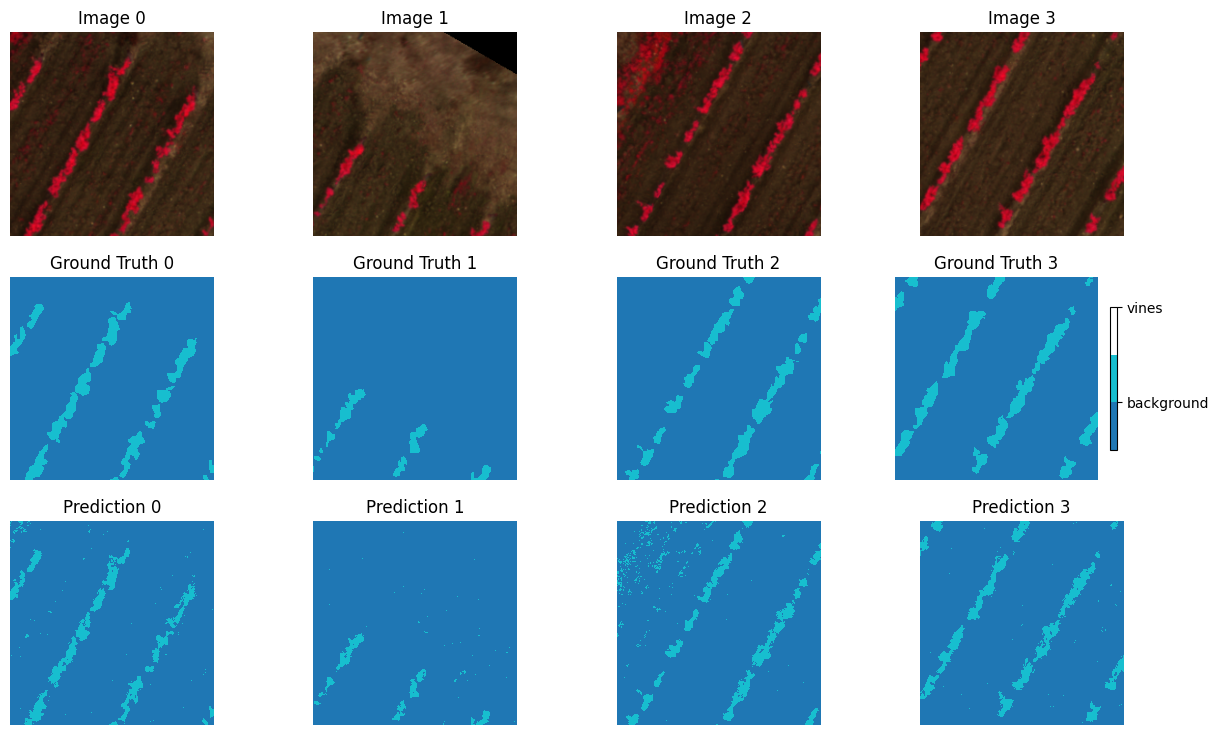

In [21]:


visualize_predictions(
    model=model,
    dataloader=test_loader_v,

    num_samples=4,
    class_names=CONFIG["class_names"],
    num_classes=CONFIG["num_classes"],
    device = CONFIG["device"]
)

RandomForest identified


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


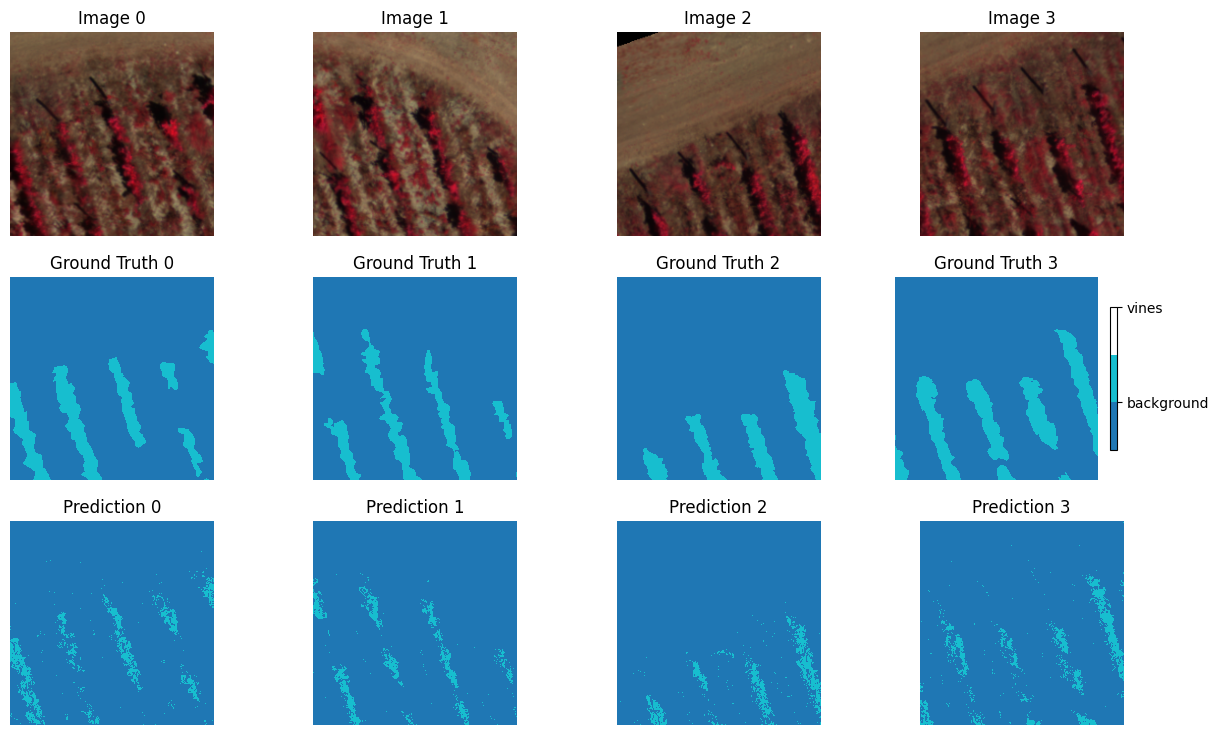

In [22]:

visualize_predictions(
    model=model,
    dataloader=test_loader_q,

    num_samples=4,
    class_names=CONFIG["class_names"],
    num_classes=CONFIG["num_classes"],
    device = CONFIG["device"]
)

In [23]:
e2 = evaluate_rf_model(model, val_loader)

v = evaluate_rf_model(model, test_loader_v)
q = evaluate_rf_model(model, test_loader_q)


Evaluating RandomForestSegmentation model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/25 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            


===== RandomForest Segmentation Performance =====
Accuracy: 0.4822 ± 0.0132
Mean IoU: 0.2875 ± 0.0075
Mean F1: 0.4200 ± 0.0074
Mean Precision: 0.4467 ± 0.0074
Mean Recall: 0.4429 ± 0.0089

Per-class metrics:
Background:
  Precision: 0.6755 ± 0.0185
  Recall: 0.4928 ± 0.0154
  F1 Score: 0.5673 ± 0.0164
  IoU: 0.4144 ± 0.0167
Vines:
  Precision: 0.2178 ± 0.0081
  Recall: 0.3929 ± 0.0104
  F1 Score: 0.2726 ± 0.0089
  IoU: 0.1607 ± 0.0057
Evaluating RandomForestSegmentation model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/40 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            


===== RandomForest Segmentation Performance =====
Accuracy: 0.9587 ± 0.0016
Mean IoU: 0.7718 ± 0.0052
Mean F1: 0.8552 ± 0.0044
Mean Precision: 0.8830 ± 0.0067
Mean Recall: 0.8408 ± 0.0023

Per-class metrics:
Background:
  Precision: 0.9735 ± 0.0007
  Recall: 0.9818 ± 0.0016
  F1 Score: 0.9775 ± 0.0009
  IoU: 0.9562 ± 0.0017
Vines:
  Precision: 0.7925 ± 0.0135
  Recall: 0.6998 ± 0.0041
  F1 Score: 0.7329 ± 0.0081
  IoU: 0.5874 ± 0.0090
Evaluating RandomForestSegmentation model...


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.                        | 0/36 [00:00<?, ?it/s]
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.            


===== RandomForest Segmentation Performance =====
Accuracy: 0.8410 ± 0.0036
Mean IoU: 0.5972 ± 0.0037
Mean F1: 0.7201 ± 0.0033
Mean Precision: 0.7643 ± 0.0050
Mean Recall: 0.7110 ± 0.0039

Per-class metrics:
Background:
  Precision: 0.8772 ± 0.0049
  Recall: 0.9324 ± 0.0032
  F1 Score: 0.9021 ± 0.0026
  IoU: 0.8230 ± 0.0043
Vines:
  Precision: 0.6514 ± 0.0124
  Recall: 0.4897 ± 0.0095
  F1 Score: 0.5382 ± 0.0059
  IoU: 0.3713 ± 0.0055


In [24]:
# Save model
model_path = os.path.join("vineseg_checkpoints", 'randomforest-1svary.pkl')
model.save(model_path)

Model saved to vineseg_checkpoints\randomforest-1svary.pkl


In [25]:
model.estimate_rf_parameters()

Estimated RF params: 2616146


2616146